Import Libraries

In [1]:
import os
import re

from transformers import pipeline
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

OS

In [2]:
folder_path = 'LA-Audios' #SET FOLDER PATH
files = os.listdir(folder_path)

Data Pre

In [3]:
text_blobs_master_ls = []

def parse_speaker_text(text):
    pattern = r'\[(\d{2}:\d{2}:\d{2}\.\d{3})\] - (Speaker \d+)\n(.*?)\n(?=\[|$)'
    matches = re.findall(pattern, text, re.DOTALL)
    text_blobs = [match[2].strip() for match in matches]

    return text_blobs

for file in files:
  with open(folder_path + "/" + file, 'r') as file:
    file_text = file.read()
    text_blobs = parse_speaker_text(file_text)

    filtered_text_blobs = []
    #remove short blobs (less 50)
    for blob in text_blobs:
      if len(blob) >= 50:
        filtered_text_blobs.append(blob)

    text_blobs_master_ls.extend(filtered_text_blobs)

len(text_blobs_master_ls)

4030

Inference

In [4]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"


tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

scores_ls = []
# for text in text_blobs_master_ls:
#     encoded_input = tokenizer(text, return_tensors='pt')
#     output = model(**encoded_input)
#     scores = output[0][0].detach().numpy()
#     scores = softmax(scores)
#     scores_ls.append(scores)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
for i in range(400):
    encoded_input = tokenizer(text_blobs_master_ls[i], return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_ls.append(scores)

In [7]:
#negative, neutral, pos
scores_ls[0]

array([0.01966394, 0.950219  , 0.03011708], dtype=float32)

In [9]:
neg_scores = [score[0] for score in scores_ls]
neut_scores = [score[1] for score in scores_ls]
pos_scores = [score[2] for score in scores_ls]

In [10]:
import matplotlib.pyplot as plt


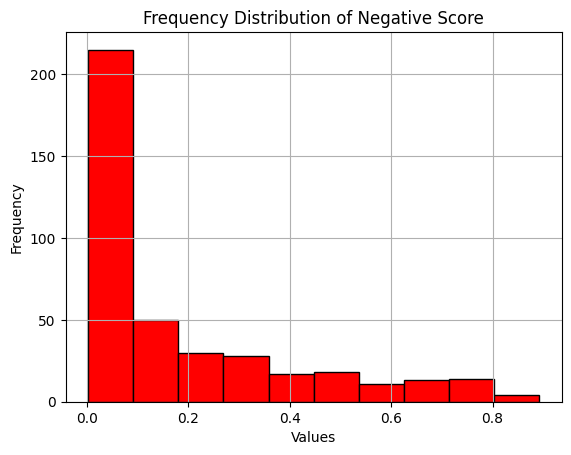

In [12]:
plt.hist(neg_scores, bins=10, color='red', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Negative Score')
plt.grid(True)
plt.show()

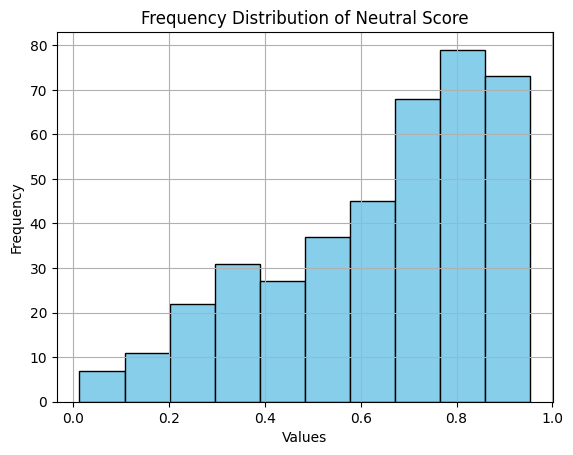

In [14]:
plt.hist(neut_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Neutral Score')
plt.grid(True)
plt.show()

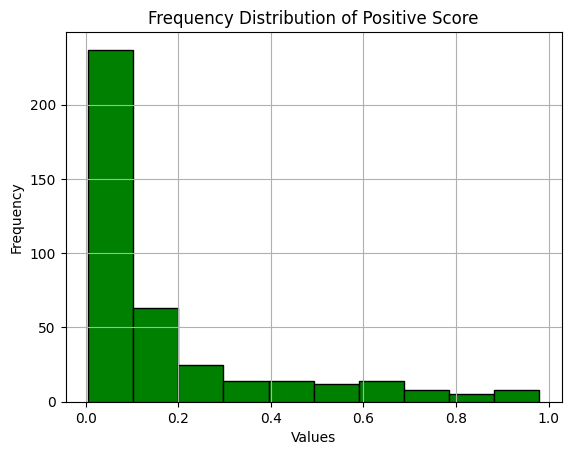

In [16]:
plt.hist(pos_scores, bins=10, color='green', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Positive Score')
plt.grid(True)
plt.show()

Examples

In [21]:
count = 0
for i in range(len(neg_scores)):
  if count == 10:
    break
  if neg_scores[i] > 0.7:
    print(text_blobs_master_ls[i])
    print(scores_ls[i])
    count += 1

My problem with this, it's like a little bit of circular reasoning. I want to take too much time on this. But would then, if the appellant wants to take that decision up with this commission, could they do that?
[0.73841184 0.2523555  0.00923263]
These things aren't super cheap for us to do. We don't have funding, a funding stream in our nonprofit budget that says West Los Angeles area planning commission appeals. We have to figure out how we can literally afford to do these, as well as the time that goes into it. That takes away from the work we do, fighting to create affordable housing, create better policies that do affordable housing, defend immigrants rights, improve our education system. All the work that we do gets sucked away by these things. We think the burden of proof means literally the burden as well as the proof. Commissioner Newhouse, you kind of edge towards it yet almost asked if I had proven that a residential use was feasible. I don't have to. A residential structure

In [22]:
count = 0
for i in range(len(pos_scores)):
  if count == 10:
    break
  if pos_scores[i] > 0.7:
    print(text_blobs_master_ls[i])
    print(scores_ls[i])
    count += 1

Good evening, commissioners. Ezra Gale for Councilman Bonin. I want to echo a lot of the general concerns that have been brought up here tonight that I think the commission eloquently spoke to, which is a desire to preserve and maintain affordable housing in the coastal zone. That's certainly something that's shared by our office and something that the councilman is working aggressively to do through the construction and support of homeless housing in council district eleven, including Venice, through supporting homeless services, through supporting an update to the mellow ordinance, through supporting linkage fees, taking a number of aggressive steps through the legislative act to ensure that we can preserve and support affordable housing in the coastal zone. As you've heard testimony tonight, the appeal here, if it is carried to its logical conclusion, will create a situation where, in a best case scenario, we will be directing an application to build what will effectively be luxury 

In [23]:
count = 0
for i in range(len(pos_scores)):
  if count == 10:
    break
  if pos_scores[i] < 0.3 and neg_scores[i] < 0.3:
    print(text_blobs_master_ls[i])
    print(scores_ls[i])
    count += 1

So we will now move on to the first case. Item number four is ZA 2014 3184 CDP Mel SPp one a CEQA ENv 2014 3183 CE this is 519 to 521 East Boccaccio Avenue and we'll start with the department report.
[0.01966394 0.950219   0.03011708]
Sorry, the staff report good evening commissioners. My name is Jason Chan, acting on behalf of the zoning administrator who was the initial decision maker for this case, with the street address of 519 521 East Picasso Avenue. This is a slide showing the location of this item number four and also item number five of today's agenda. The locations are just over 500ft apart from each other and both projects have the same representative and the same appellant. Both projects are within the Venice Community plan single jurisdiction area of the California coastal zone and the Venice specific plan. Since the appeal for items four and five are nearly the same, many of the same slides will apply to both cases. 519 521 Boccaccio Avenue is zoned M One and designated f